In [74]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from dsn.util.systems import SCCircuit


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
nlayers = 10

param_str = 'full'

rule = 10.0
fixed_params = {'E_constant':0.0, \
                'E_Pbias':0.0, \
                'E_Prule':rule, \
                'E_Arule':rule, \
                'E_choice':2.0, \
                'E_light':1.0}

C = 2

p = 1.0
inact_str = "NI"

behavior_type = "WTA"
means = np.array([p, p, 0.0, 0.0, 1.0, 1.0])

barrier_EPS = 1e-10
behavior = {
    "type": behavior_type,
    "means": means,
    "bounds":np.zeros(C)-barrier_EPS,
    "inact_str":inact_str
}

model_opts = {"params":param_str, "C":C}
system = SCCircuit(fixed_params, behavior, model_opts)

In [81]:
M = 1000
minval = -10.0
maxval = 10.0
sW_P = np.random.uniform(0, maxval, (M,))
sW_A = np.random.uniform(0, maxval, (M,))
vW_PA = np.random.uniform(minval, 0, (M,))
vW_AP = np.random.uniform(minval, 0, (M,))
dW_PA = np.random.uniform(0, maxval, (M,))
dW_AP = np.random.uniform(minval, 0, (M,))
hW_P = np.random.uniform(-20.0, -5, (M,))
hW_A = np.random.uniform(-20.0, -5, (M,))

_Z = np.expand_dims(np.stack([sW_P, sW_A, 
                              vW_PA, vW_AP, 
                              dW_PA, dW_AP,
                              hW_P, hW_A], axis=1), axis=0)
Z = tf.placeholder(tf.float64, (1, None, system.D))

v_t = system.simulate(Z)
T_x = system.compute_suff_stats(Z)
I_x = system.compute_I_x(Z, T_x)

In [82]:
with tf.Session() as sess:
    _v_t, _T_x, _I_x = sess.run([v_t, T_x, I_x], {Z:_Z})

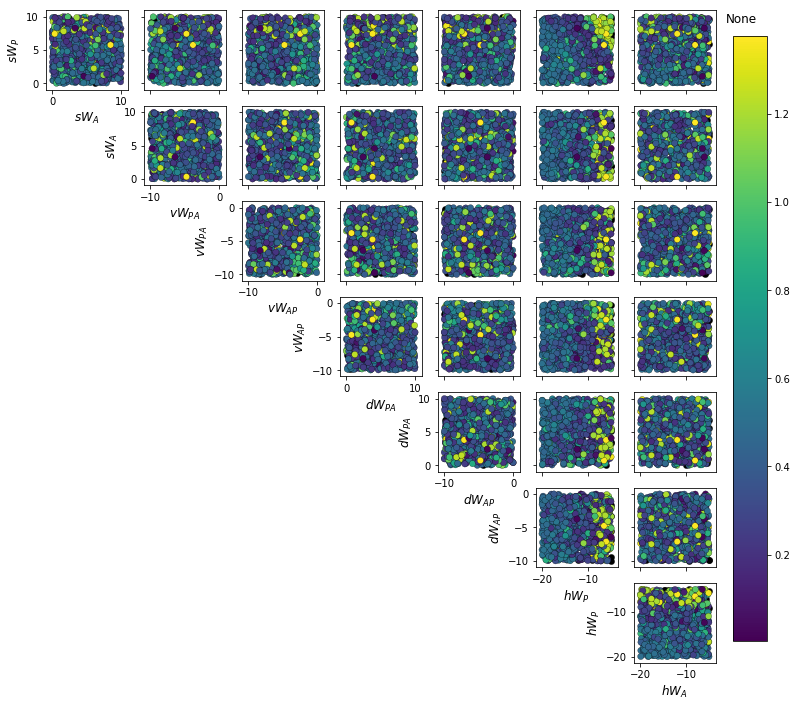

In [83]:
from dsn.util.plot_util import pairplot
_mu = np.expand_dims(system.mu, 0)
d = np.sum(np.square(_T_x[0] - _mu), 1)
dists = pairplot(_Z[0], range(system.D), system.z_labels, c=d)

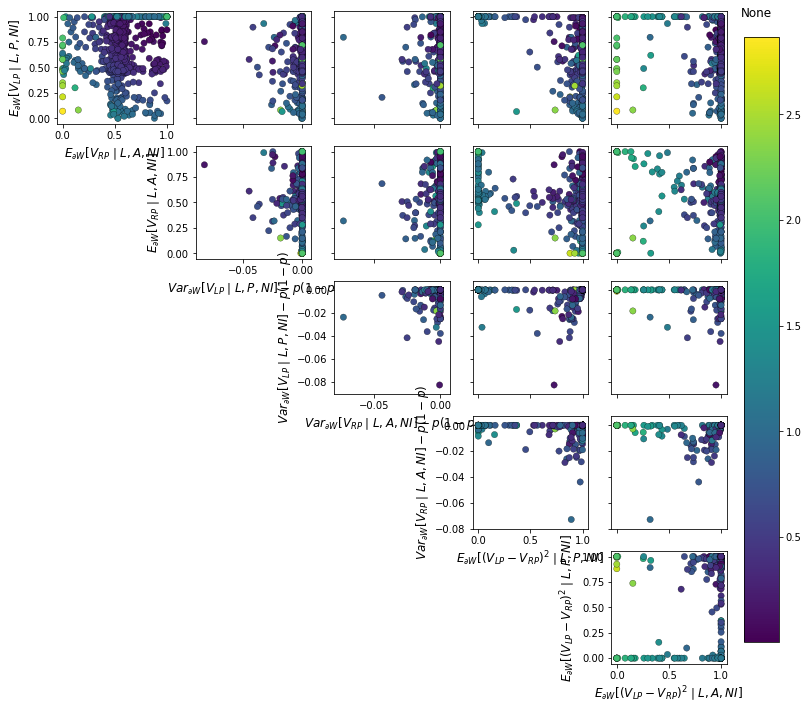

In [84]:
dists = pairplot(_T_x[0], range(6), system.T_x_labels, 
                 c=d, outlier_stds=10)

In [161]:
print(_v_t.shape)
row_inds = [1,0,0,1]
col_inds = [0,0,1,1]
titles = ['Left, Pro', 'Left, Anti', 'Right, Anti', 'Right, Pro']

(75, 2, 1000, 4, 100)


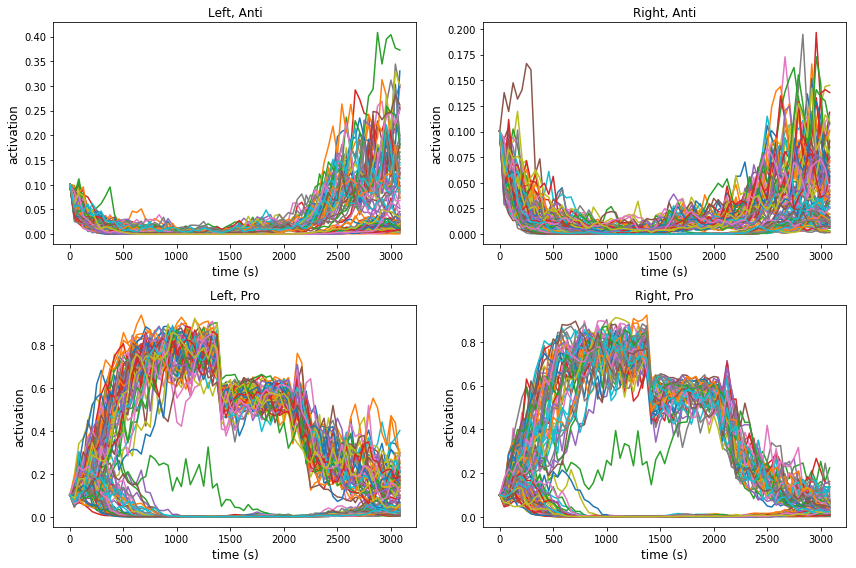

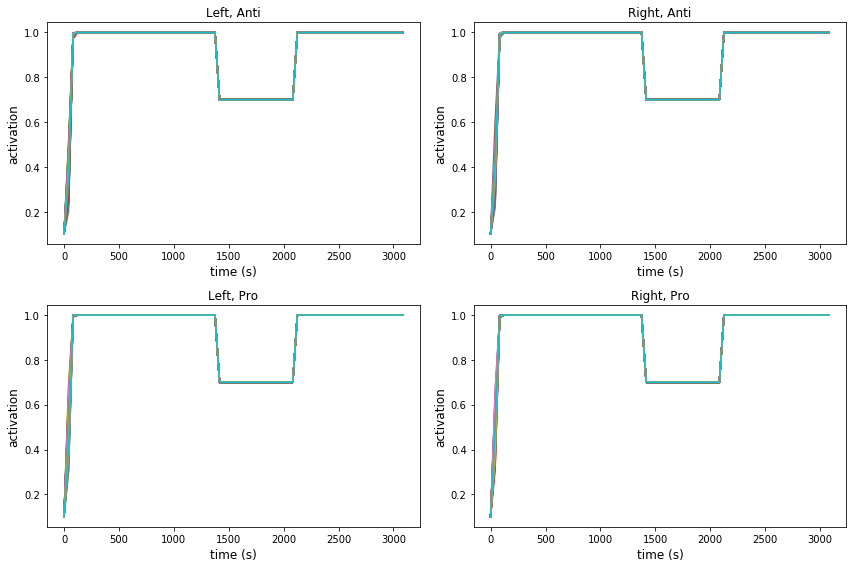

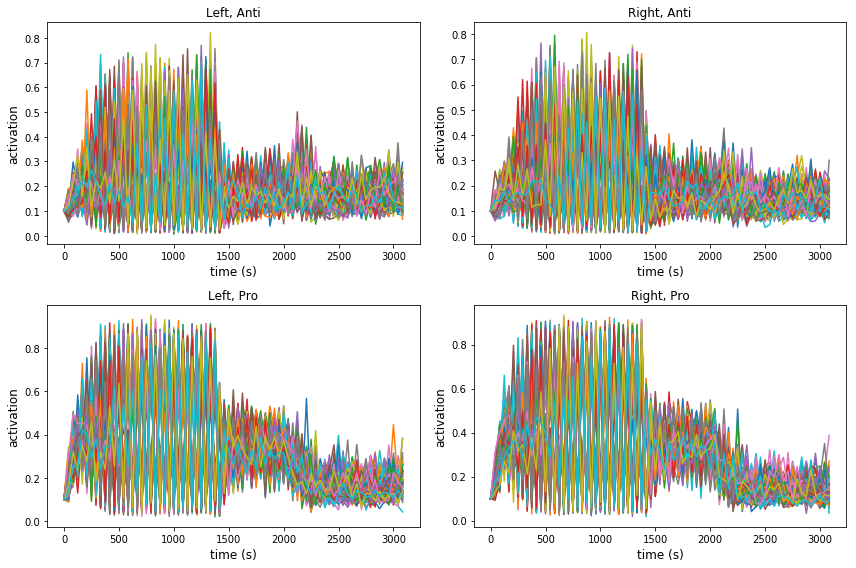

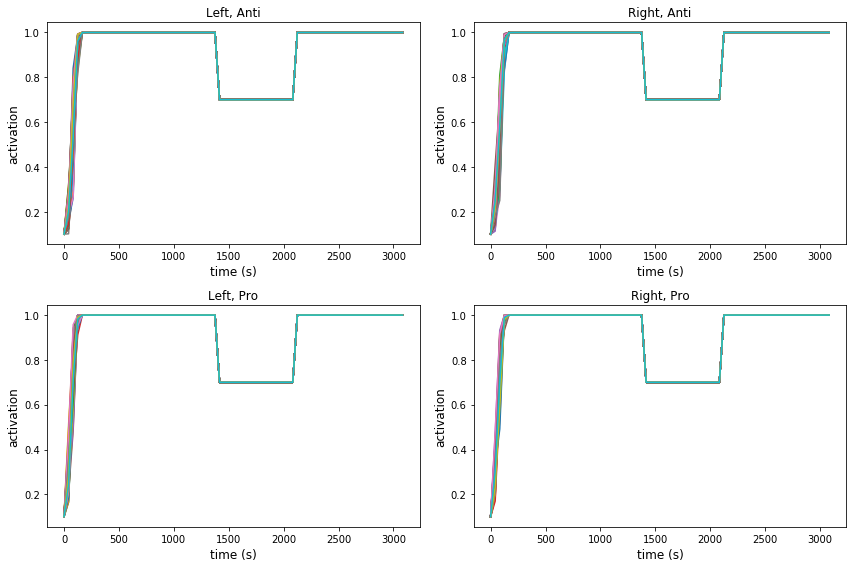

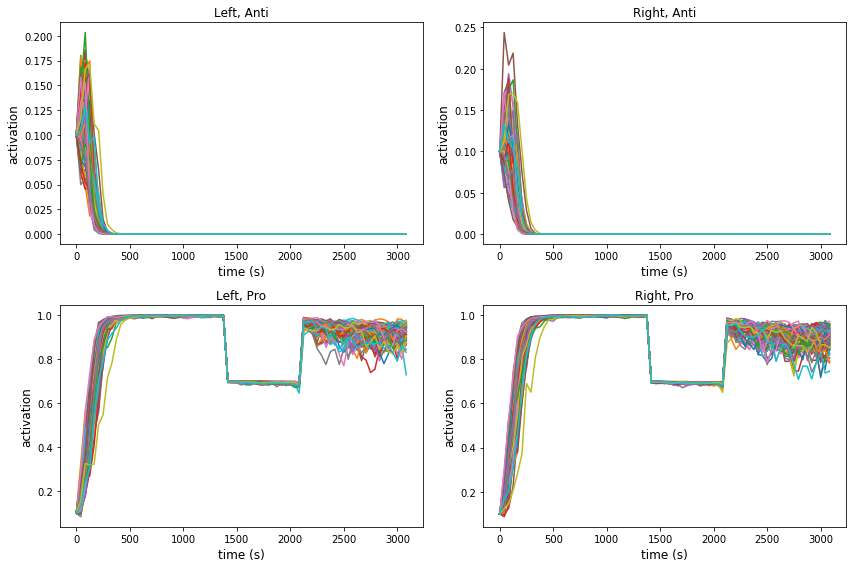

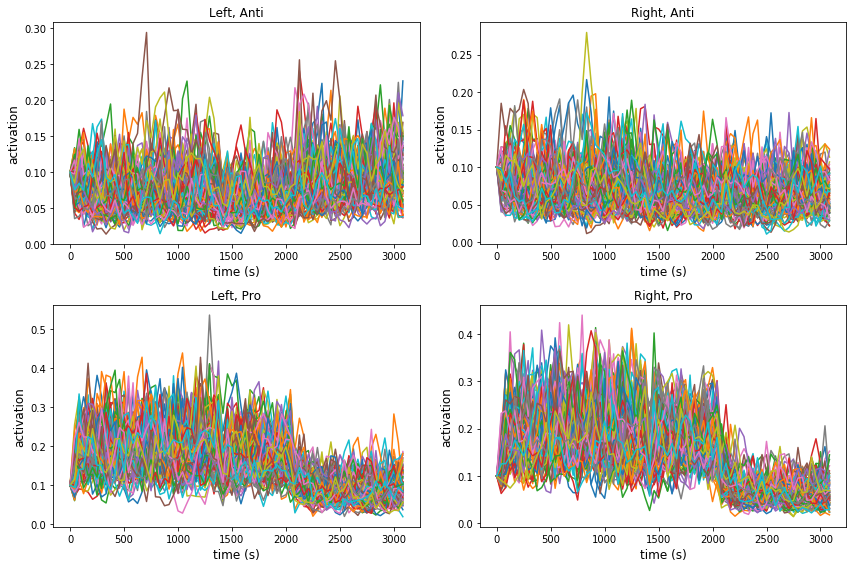

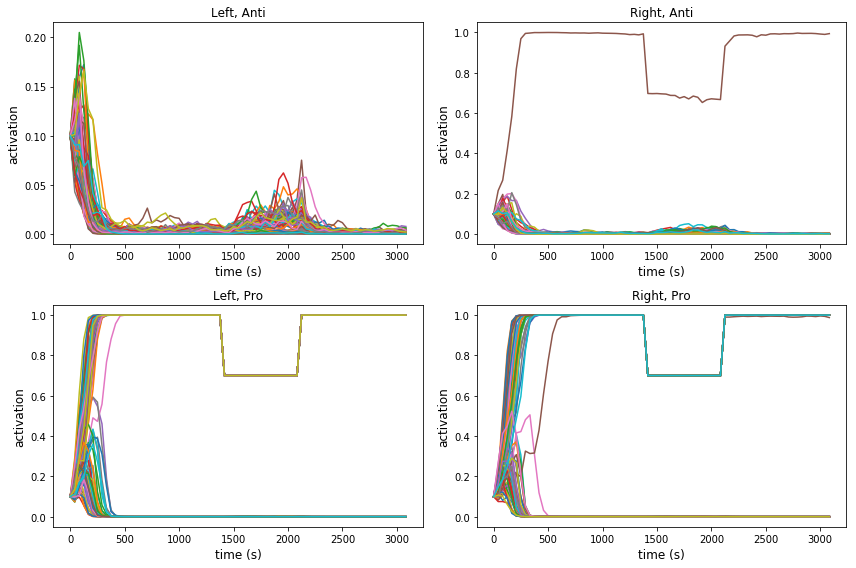

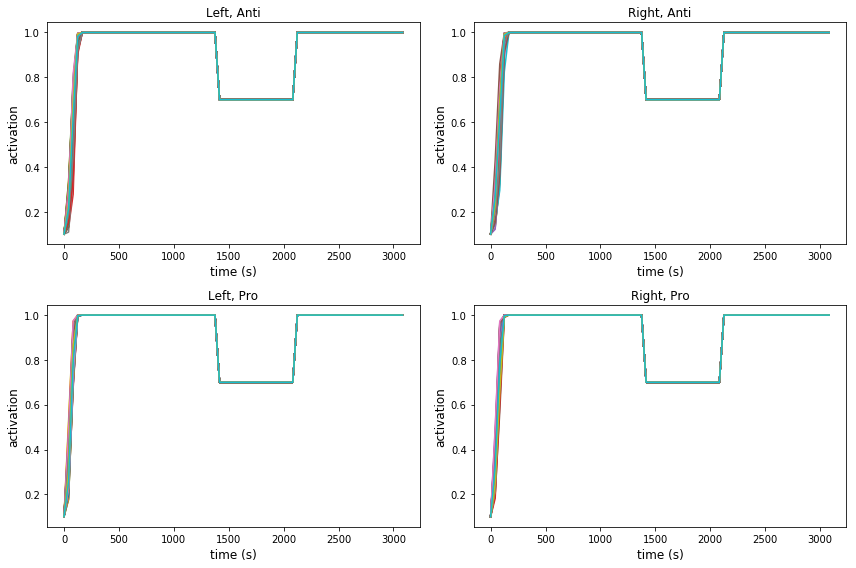

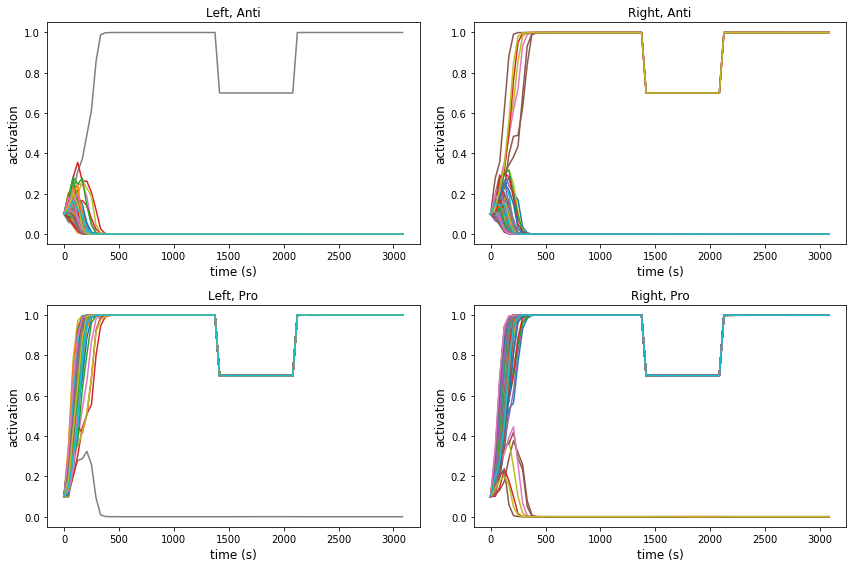

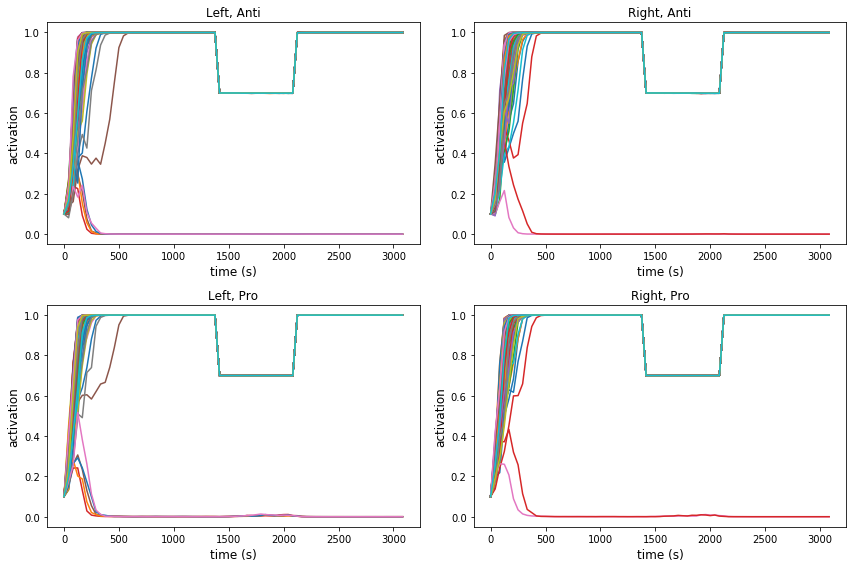

In [17]:
fontsize = 12
t = np.arange(system.T) / system.dt

for i in range(10):
    fig, axs = plt.subplots(2,2,figsize=(12,8))
    for ind in range(4):
        ax = axs[row_inds[ind]][col_inds[ind]]
        ax.plot(t, _v_t[:,0,i,ind,:])
        ax.set_xlabel('time (s)', fontsize=fontsize)
        ax.set_ylabel('activation', fontsize=fontsize)
        ax.set_title(titles[ind], fontsize=fontsize)
    plt.tight_layout()
    plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

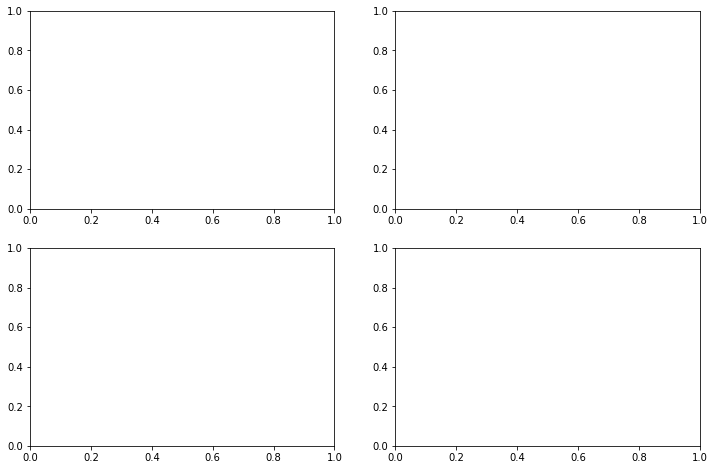

In [8]:
fontsize = 12
t = np.arange(system.T) / system.dt

for i in range(10):
    fig, axs = plt.subplots(2,2,figsize=(12,8))
    for ind in range(4):
        ax = axs[row_inds[ind]][col_inds[ind]]
        ax.plot(t, _v_t[:,1,i,ind,:])
        ax.set_xlabel('time (s)', fontsize=fontsize)
        ax.set_ylabel('activation', fontsize=fontsize)
        ax.set_title(titles[ind], fontsize=fontsize)
    plt.tight_layout()
    plt.show()